In [2]:
# Imported Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('UCI_Credit_Card.csv')

In [5]:
pd.set_option('display.max_columns', None)
df 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [6]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64

In [7]:
X_train, X_test, y_train, y_test  = train_test_split(df.drop('target', axis= 1), df['target'], test_size = 0.3,random_state=42)

In [10]:
model1 = LogisticRegression(class_weight = 'balanced', random_state = 42, solver = 'newton-cg',max_iter= 150)
model1.fit(X_train,y_train)

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(


LogisticRegression(class_weight='balanced', max_iter=150, random_state=42,
                   solver='newton-cg')

In [12]:
y_pred = model1.predict(X_test)

In [13]:
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [14]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6906666666666667


              precision    recall  f1-score   support

           0       0.87      0.71      0.78      7040
           1       0.38      0.63      0.47      1960

    accuracy                           0.69      9000
   macro avg       0.62      0.67      0.63      9000
weighted avg       0.77      0.69      0.71      9000

Model train score: 0.695
Model test score: 0.6906666666666667


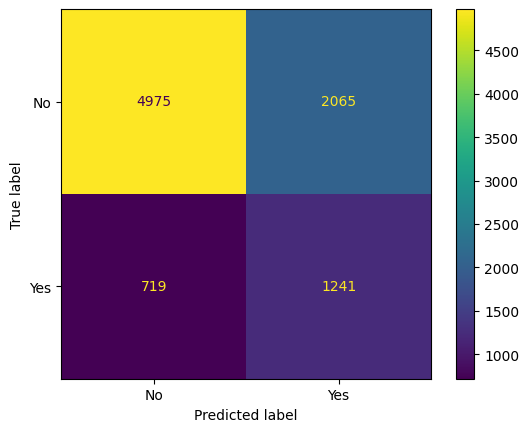

In [18]:
print(classification_report(y_test, y_pred))
confusion=confusion_matrix(y_test,y_pred)
fig= ConfusionMatrixDisplay(confusion_matrix=confusion,display_labels=["No","Yes"])
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)
print("Model train score: "+ str(train_score))
print("Model test score: "+str(test_score))
fig.plot()
plt.show()